Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [4]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix,accuracy_score

%matplotlib inline

In [5]:
### Data Preprocessing ###

dataset = pd.read_csv('HR-Employee-Attrition.csv')

In [6]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
dataset.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [9]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
dataset['Attrition_ind'] = 0 
dataset.loc[dataset['Attrition'] =='Yes', 'Attrition_ind'] = 1

In [11]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [14]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)
dataset.columns
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0


In [15]:
data_main=dataset.drop(['EmployeeCount',
       'EmployeeNumber','Over18_Y','StandardHours','Attrition_No', 'Attrition_Yes'],axis=1)
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [16]:
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'Jo

In [17]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,0,0


In [18]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [19]:
X=data_main.drop('Attrition',axis=1)
y=data_main.Attrition

In [20]:
count=0
for i in y:
    if i==1:
        count=count+1
print(count)

237


In [21]:
features_label = data_main.columns[:-1]

In [22]:
print(features_label)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [21]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) Age                            0.068787
 2) DailyRate                      0.058087
 3) DistanceFromHome               0.050395
 4) Education                      0.047892
 5) EnvironmentSatisfaction        0.046385
 6) HourlyRate                     0.044061
 7) JobInvolvement                 0.043066
 8) JobLevel                       0.041470
 9) JobSatisfaction                0.034565
10) MonthlyIncome                  0.032825
11) MonthlyRate                    0.032558
12) NumCompaniesWorked             0.031942
13) PercentSalaryHike              0.030133
14) PerformanceRating              0.029651
15) RelationshipSatisfaction       0.028564
16) StockOptionLevel               0.028015
17) TotalWorkingYears              0.027299
18) TrainingTimesLastYear          0.024223
19) WorkLifeBalance                0.024184
20) YearsAtCompany                 0.023405
21) YearsInCurrentRole             0.022142
22) YearsSinceLastPromotion        0.021940
23) YearsWithCurrManager        

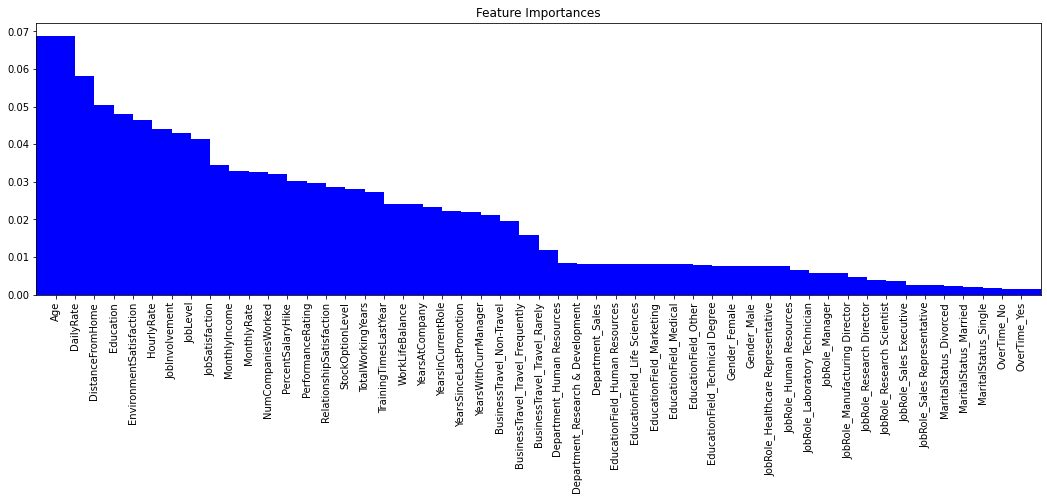

In [22]:
plt.subplots(figsize=(18,5))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="blue", align="center", width=2)
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.savefig('imoprtance.png',bbox_inches='tight', pad_inches = 0.0)
plt.show()

In [23]:
# Splitting into Train and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [24]:
print(X_train.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
dump(sc, 'std_scaler.bin', compress=True)
X_train = X_train2
X_test = X_test2

In [27]:
print(y_test)

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64


In [28]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

NameError: name 'accuracy_score' is not defined

In [29]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

In [30]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 26, kernel_initializer = 'uniform', activation = 'relu', input_dim = 51))

# Adding the second hidden layer
classifier.add(Dense(units = 26, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 40)

Epoch 1/40
118/118 [==============================] - 1s 6ms/step - loss: 0.5484 - accuracy: 0.8384
Epoch 2/40
118/118 [==============================] - 1s 6ms/step - loss: 0.3600 - accuracy: 0.8401
Epoch 3/40
118/118 [==============================] - 1s 6ms/step - loss: 0.3339 - accuracy: 0.8401
Epoch 4/40
118/118 [==============================] - 1s 6ms/step - loss: 0.3179 - accuracy: 0.8435
Epoch 5/40
118/118 [==============================] - 1s 7ms/step - loss: 0.3021 - accuracy: 0.8724
Epoch 6/40
118/118 [==============================] - 1s 7ms/step - loss: 0.2867 - accuracy: 0.8903
Epoch 7/40
118/118 [==============================] - 1s 7ms/step - loss: 0.2698 - accuracy: 0.9039
Epoch 8/40
118/118 [==============================] - 1s 7ms/step - loss: 0.2567 - accuracy: 0.9150
Epoch 9/40
118/118 [==============================] - 1s 7ms/step - loss: 0.2455 - accuracy: 0.9192
Epoch 10/40
118/118 [==============================] - 1s 6ms/step - loss: 0.2294 - accuracy: 0.9277

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.5)
#print(y_pred)
xl=(list(X_test.index))
for i in range(0,len(xl)):
    if y_pred[i][0]==True:
        print(str(xl[i])+ " - " +str(y_pred[i][0]))

981 - True
1332 - True
1058 - True
122 - True
540 - True
853 - True
54 - True
1436 - True
1462 - True
1375 - True
4 - True
182 - True
642 - True
310 - True
204 - True
740 - True
1131 - True
14 - True
583 - True
995 - True
107 - True
838 - True
656 - True
1396 - True
536 - True
1411 - True
1460 - True
1425 - True
1137 - True
634 - True
1413 - True
1438 - True
632 - True
47 - True
717 - True
1368 - True
505 - True
443 - True
124 - True


In [33]:
classifier.save("model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/assets


Test Data Accuracy: 0.8197


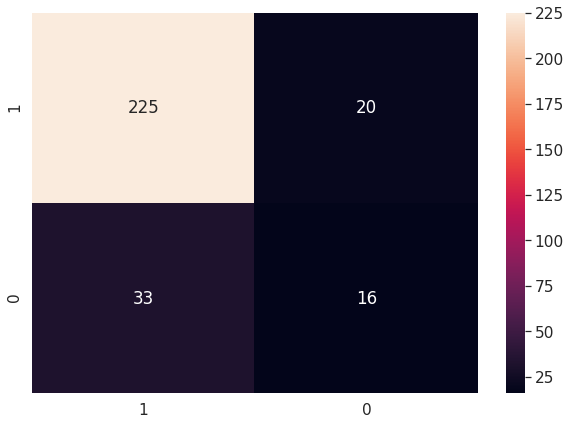

In [32]:
## EXTRA: Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [33]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       245
           1       0.44      0.33      0.38        49

    accuracy                           0.82       294
   macro avg       0.66      0.62      0.64       294
weighted avg       0.80      0.82      0.81       294



In [41]:
reconstructed_model = keras.models.load_model("model")

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
t = pd.DataFrame(sc.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [42]:
# np.testing.assert_allclose(loaded(X), outputs)
y_pred = reconstructed_model.predict(X_test)

y_pred = (y_pred > 0.5)
#print(y_pred)
xl=(list(X_test.index))
for i in range(0,len(xl)):
    if y_pred[i][0]==True:
        print(str(xl[i])+ " - " +str(y_pred[i][0]))

981 - True
1332 - True
1058 - True
122 - True
54 - True
319 - True
1436 - True
1462 - True
4 - True
182 - True
1032 - True
528 - True
1180 - True
483 - True
310 - True
740 - True
1131 - True
14 - True
1083 - True
2 - True
995 - True
107 - True
838 - True
656 - True
1084 - True
295 - True
1396 - True
536 - True
1411 - True
572 - True
1263 - True
1137 - True
47 - True
717 - True
443 - True
124 - True


In [26]:
from joblib import load
reconstructed_model = keras.models.load_model("model")
sc=load('std_scaler.bin')

dataset = pd.read_csv('HR-Employee-Attrition1.csv')

# dataset['Attrition_ind'] = 0 
# dataset.loc[dataset['Attrition'] =='Yes', 'Attrition_ind'] = 1  
dataset = pd.get_dummies(dataset)
data_main=dataset.drop(['EmployeeCount',
       'EmployeeNumber','Over18_Y','StandardHours','Attrition_No', 'Attrition_Yes'],axis=1)
# data_main['Attrition']=data_main['Attrition_ind']
# data_main=data_main.drop(['Attrition_ind'],axis=1)
# X=data_main.drop('Attrition',axis=1)
# y=data_main.Attrition
X = data_main
# print(y[0])
print(X.columns)
X_test2 = pd.DataFrame(sc.transform(X))
X_test2.columns = X.columns.values
X_test2.index = X.index.values
X_test = X_test2
# print(X_test.head())
y_pred = reconstructed_model.predict(X_test)

y_pred = (y_pred > 0.5)
#print(y_pred)
xl=(list(X_test.index))
for i in range(0,len(xl)):
    if y_pred[i][0]==True:
        print(str(xl[i])+ " - " +str(y_pred[i][0])+" - "+str(y[i]))

#        'YearsSinceLastPromotion', 'YearsWithCurrManager',
#        'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
#        'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
#        'Department_Research & Development', 'Department_Sales',
#        'EducationField_Human Resources', 'EducationField_Life Sciences',
#        'EducationField_Marketing', 'EducationField_Medical',
#        'EducationField_Other', 'EducationField_Technical Degree',
#        'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
#        'JobRole_Human Resources', 'JobRole_Laboratory Technician',
#        'JobRole_Manager', 'JobRole_Manufacturing Director',
#        'JobRole_Research Director', 'JobRole_Research Scientist',
#        'JobRole_Sales Executive', 'JobRole_Sales Representative',
#        'MaritalStatus_Divorced', 'MaritalStatus_Married',
#        'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou